<a href="https://colab.research.google.com/github/gitflamingo/Brain-Tumor-Detection-Project/blob/main/detectorTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Este código utiliza la biblioteca zipfile para extraer el contenido de un archivo ZIP llamado brain-mri-images-for-brain-tumor-detection.zip. La función ZipFile crea un objeto ZipFile que representa el archivo ZIP y toma dos argumentos: el nombre del archivo ZIP y el modo de apertura ('r' en este caso, que significa "solo lectura").
#La función extractall extrae todo el contenido del archivo ZIP en el directorio /content. Este directorio debe existir antes de que se llame a esta función. Si hay archivos con los mismos nombres en el directorio de extracción, se sobrescribirán sin previo aviso.
#La función close se llama para cerrar el archivo ZIP y liberar los recursos del sistema utilizados por el objeto ZipFile.

import zipfile
zip_ref = zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
#Este código importa varias bibliotecas de Python para la construcción de un modelo de aprendizaje profundo utilizando la biblioteca Keras.
#La biblioteca os es una biblioteca estándar de Python que proporciona una forma de interactuar con el sistema de archivos del sistema operativo subyacente.
#La biblioteca keras es una biblioteca de aprendizaje profundo de alto nivel que proporciona una API de red neuronal fácil de usar. La biblioteca Sequential de Keras se utiliza para construir modelos de redes neuronales secuenciales.
#Los módulos Conv2D, MaxPooling2D, Flatten, Dense, Dropout y BatchNormalization de Keras se utilizan para construir capas de redes neuronales convolucionales y completamente conectadas.
#La biblioteca PIL proporciona una forma de manipular imágenes en Python.
#La biblioteca numpy se utiliza para realizar operaciones matemáticas en matrices y arreglos multidimensionales.
#La biblioteca pandas proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento.
#La biblioteca matplotlib se utiliza para la visualización de datos.
#La función train_test_split se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
#La clase OneHotEncoder se utiliza para codificar variables categóricas como variables numéricas.

import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
#Este código utiliza la clase OneHotEncoder de la biblioteca sklearn.preprocessing para transformar una variable categórica en una variable numérica.
#En este caso, el vector binario resultante para la categoría "Tumor" sería [1, 0] y para la categoría "Normal" sería [0, 1].

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [5]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../content/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../content/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
#Este código convierte una lista de Python llamada data en un array numpy utilizando la función np.array de la biblioteca numpy y luego imprime la forma del array utilizando el atributo shape.

data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
#La función np.array convierte la variable result en un array numpy. Luego, el método reshape de numpy se utiliza para cambiar la forma del array. En este caso, la nueva forma es especificada como (139,2), lo que significa que el array debe tener 139 filas y 2 columnas.

result = np.array(result)
result = result.reshape(139,2)

In [9]:
#Este código utiliza la función train_test_split de la biblioteca sklearn.model_selection para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
#La función toma como argumentos data y result, que son el conjunto de características y etiquetas respectivamente. También especifica que el tamaño del conjunto de prueba será el 20% del conjunto de datos total mediante el argumento test_size=0.2. El argumento shuffle=True asegura que los datos se barajen antes de la división y random_state=0 especifica que se utilizará una semilla aleatoria para la división, lo que significa que los resultados serán reproducibles.
#El resultado de la función train_test_split son cuatro conjuntos de datos: x_train, x_test, y_train y y_test. x_train y y_train son los conjuntos de entrenamiento para las características y etiquetas respectivamente, mientras que x_test y y_test son los conjuntos de prueba.

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
#Este código define una red neuronal convolucional utilizando el modelo secuencial de Keras.
#El modelo se compone de varias capas, que se agregan a la red utilizando el método add() del objeto model.
#Las capas convolucionales se definen utilizando la clase Conv2D y tienen como argumentos el número de filtros, el tamaño del kernel, la función de activación y el tamaño de relleno. La primera capa convolucional tiene una forma de entrada especificada con el argumento input_shape.
#La normalización por lotes se realiza utilizando la clase BatchNormalization.
#La capa de agrupación máxima se define utilizando la clase MaxPooling2D.
#La regularización se realiza utilizando la clase Dropout.
#La capa completamente conectada se define utilizando la clase Dense.
#La función de pérdida y el optimizador se especifican utilizando el método compile() del objeto model.
#Finalmente, el resumen del modelo se imprime utilizando el método summary().

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [11]:
#y_train.shape devuelve una tupla que indica el tamaño de cada dimensión de la matriz y_train. Por ejemplo, si y_train tiene forma (1000, 10), significa que hay 1000 ejemplos de entrenamiento y cada ejemplo se clasifica en 10 categorías diferentes.

y_train.shape

(111, 2)

In [12]:
#Este código entrena el modelo definido anteriormente (model) utilizando los datos de entrenamiento x_train y las etiquetas de entrenamiento y_train. El entrenamiento se realiza durante 300 épocas (epochs) con un tamaño de lote (batch_size) de 256 ejemplos.
#El argumento verbose se establece en 1 para mostrar información detallada sobre el progreso del entrenamiento en la consola.
#Además, se especifica un conjunto de validación (validation_data) que se utiliza para evaluar el modelo después de cada época durante el entrenamiento. En este caso, el conjunto de validación se define utilizando los datos de prueba (x_test) y las etiquetas de prueba (y_test).
#El resultado del entrenamiento se almacena en el objeto history, que contiene información sobre la evolución de la función de pérdida y las métricas de rendimiento durante el entrenamiento.

history = model.fit(x_train, y_train, epochs = 300, batch_size = 256, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/300
1/1 [==============================] - 15s 15s/step - loss: 1.7815 - val_loss: 65.9593
Epoch 2/300
1/1 [==============================] - 0s 199ms/step - loss: 18.7207 - val_loss: 23.7713
Epoch 3/300
1/1 [==============================] - 0s 199ms/step - loss: 5.4698 - val_loss: 19.1265
Epoch 4/300
1/1 [==============================] - 0s 195ms/step - loss: 2.1105 - val_loss: 12.1095
Epoch 5/300
1/1 [==============================] - 0s 198ms/step - loss: 1.6744 - val_loss: 13.7741
Epoch 6/300
1/1 [==============================] - 0s 195ms/step - loss: 2.8535 - val_loss: 6.5935
Epoch 7/300
1/1 [==============================] - 0s 207ms/step - loss: 2.4364 - val_loss: 10.4637
Epoch 8/300
1/1 [==============================] - 0s 218ms/step - loss: 0.7661 - val_loss: 12.2851
Epoch 9/300
1/1 [==============================] - 0s 209ms/step - loss: 0.4226 - val_loss: 10.4950
Epoch 10/300
1/1 [==============================] - 0s 210ms/step - loss: 0.3099 - val_loss: 8.4893
E

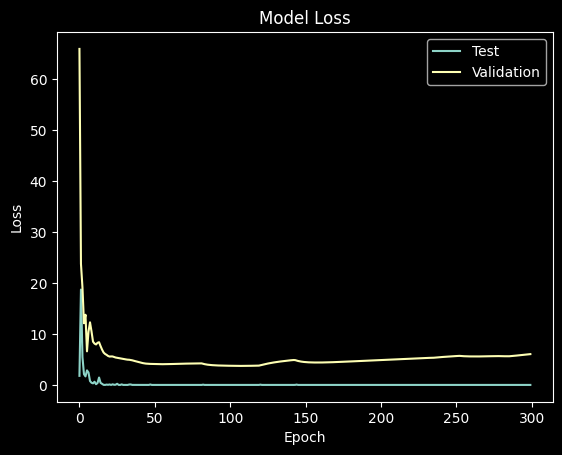

In [13]:
#Este código grafica la evolución de la función de pérdida (loss) del modelo durante el entrenamiento y la validación. Utiliza los datos almacenados en el objeto history generado por la función model.fit().
#La función plt.plot() se utiliza para graficar la evolución de la pérdida del modelo en cada época (epoch) del entrenamiento y validación. La línea azul corresponde a la pérdida del conjunto de entrenamiento (history.history['loss']) y la línea naranja corresponde a la pérdida del conjunto de validación (history.history['val_loss']).
#Además, se establece un título para la gráfica (plt.title()), etiquetas para los ejes x e y (plt.xlabel() y plt.ylabel() respectivamente) y una leyenda que indica qué línea corresponde a cada conjunto de datos (plt.legend()).

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [14]:
#Esta es una función que toma un número como entrada (number) y devuelve una cadena de texto que describe el número

def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

57.82955288887024% Confidence This Is Its a Tumor


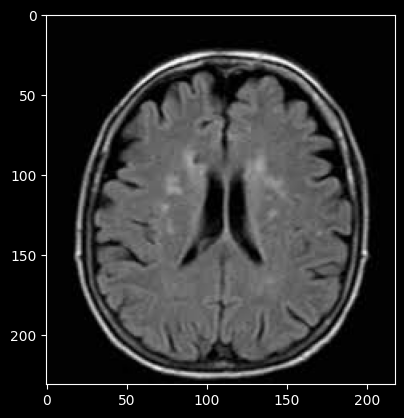

In [15]:
#Este código carga una imagen (img) y la redimensiona a un tamaño de 128x128 píxeles utilizando la función resize() de la librería PIL. Luego, se convierte la imagen en un array de NumPy utilizando la función np.array(), y se ajusta la forma del array para que sea compatible con la entrada del modelo.
#A continuación, se realiza una predicción utilizando el modelo entrenado (model.predict_on_batch(x)) sobre la imagen procesada y se almacena en res. La variable classification almacena el índice de la clase predicha, obtenido a partir de la salida del modelo res. Luego se utiliza la función np.where() para obtener el índice de la clase con el mayor valor de confianza, y se llama a la función names() para obtener la etiqueta correspondiente a esa clase.
#Finalmente, se utiliza la función imshow() para mostrar la imagen original, y se imprime en pantalla un mensaje que indica el nivel de confianza del modelo en la predicción y la etiqueta asignada a la imagen.

from matplotlib.pyplot import imshow
img = Image.open(r"../content/no/17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

72.21367359161377% Confidence This Is No, Its not a tumor


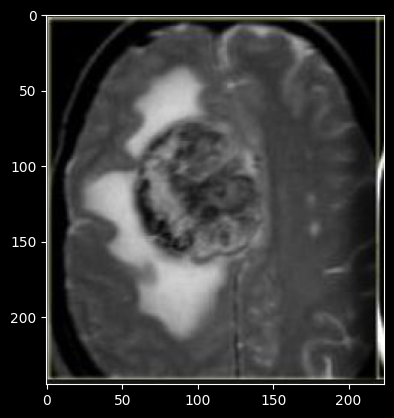

In [16]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/yes/Y120.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

85.8525037765503% Confidence This Is No, Its not a tumor


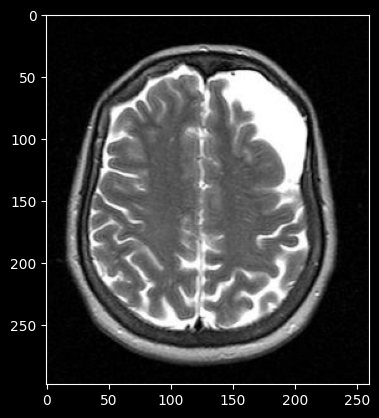

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/yes/Y115.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [18]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 256, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 308ms/step - loss: 2.1479e-09 - val_loss: 6.0749
Epoch 2/100
1/1 [==============================] - 0s 198ms/step - loss: 7.3175e-04 - val_loss: 6.1125
Epoch 3/100
1/1 [==============================] - 0s 201ms/step - loss: 1.0847e-07 - val_loss: 6.1481
Epoch 4/100
1/1 [==============================] - 0s 200ms/step - loss: 1.4284e-07 - val_loss: 6.1823
Epoch 5/100
1/1 [==============================] - 0s 199ms/step - loss: 8.3443e-07 - val_loss: 6.2147
Epoch 6/100
1/1 [==============================] - 0s 202ms/step - loss: 0.0000e+00 - val_loss: 6.2456
Epoch 7/100
1/1 [==============================] - 0s 197ms/step - loss: 3.0715e-07 - val_loss: 6.2748
Epoch 8/100
1/1 [==============================] - 0s 196ms/step - loss: 2.1479e-09 - val_loss: 6.3029
Epoch 9/100
1/1 [==============================] - 0s 196ms/step - loss: 0.0000e+00 - val_loss: 6.3297
Epoch 10/100
1/1 [==============================] - 0s 196ms/step - loss:

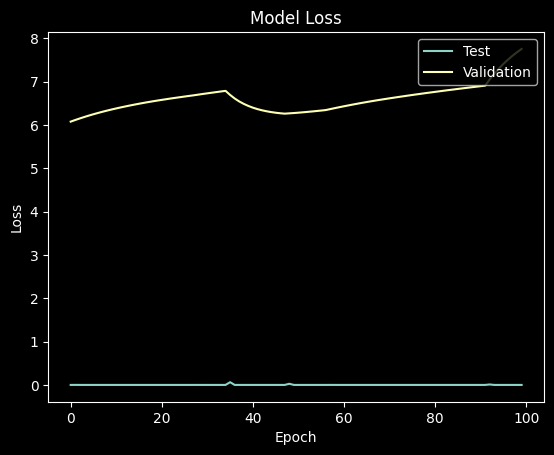

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [20]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

66.84097647666931% Confidence This Is Its a Tumor


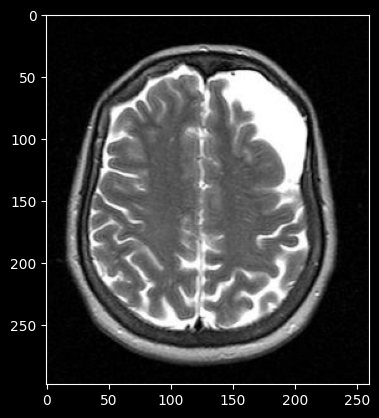

In [21]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/yes/Y115.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is Its a Tumor


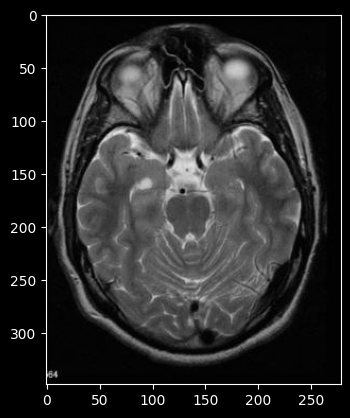

In [27]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/yes/Y251.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))